In [5]:
author__ = "__fbbianco__"
''' 
    CUSP 2016 UCSL
    Continuous probability distributions demos
'''
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import pylab as pl
import time
import json
import os

from IPython import display

# this imports some of the pylab settings I like for plotting
#if you want to run the notebook you can comment it out, or download the files 
#here and set up the environmentail variable PUI2015
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )

pl.rcParams.update(s)
pl.rcParams['font.size'] = 20

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Evolution of samples drawn under different distributions as the distribution parameters and sample size change

### Binomial B(100,p), change p

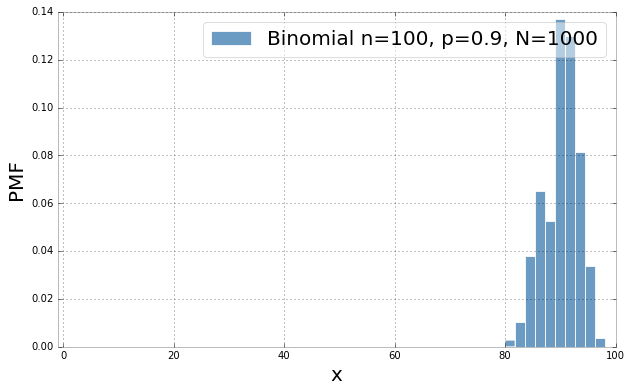

In [7]:
from IPython import display
np.random.seed(111)
n = 100
N = 1000
pl.figure(figsize=(10, 6))

#for loop over the parameter p
for p in [0.1, 0.25, 0.5, 0.75, 0.9]:
    pl.clf()
    
    pl.hist(np.random.binomial(n, p, N), alpha = 0.8, 
            label = "Binomial n=%d, p=%.1f, N=%d"%(n, p, N),
            color = 'SteelBlue', normed = True)
    pl.ylabel("PMF", fontsize = 20)
    pl.xlabel("x", fontsize = 20)
    pl.xlim(-1,100)
    pl.legend(fontsize = 20, framealpha=0.5,)
    
    display.display(pl.gcf())
    display.clear_output(wait = True)
    time.sleep(1)

### Poisson distribution P(lambda), changing  lambda

KeyboardInterrupt: 

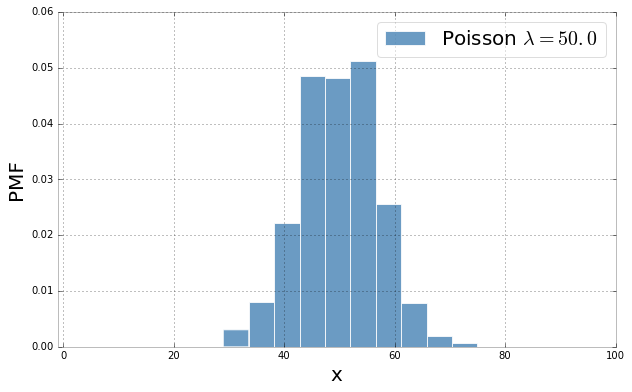

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "//anaconda/envs/p2nb/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/p2nb/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/p2nb/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/p2nb/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/p2nb/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 379, in execute_request
    time.sleep(self._execute_sleep)
KeyboardInterrupt
ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "//anaconda/envs/p2nb/lib/python2.7/site-packages/zmq/

In [ ]:
from scipy.stats import poisson

np.random.seed(111)
pl.figure(figsize=(10, 6))

# loop pver the parameter lambda
for lmbd in [1, 5, 10, 25, 50]:    
    pl.clf()
    pl.hist(np.random.poisson(lmbd, size=1000), alpha = 0.8, 
            label = r"Poisson $\lambda=%.1f$"%(lmbd), 
            color = 'SteelBlue', normed = True)
    pl.xlim(-1, 100)
    pl.ylabel("PMF", fontsize = 20)
    pl.xlabel("x", fontsize = 20)
    pl.legend(fontsize = 20, framealpha=0.5)
    display.display(pl.gcf())
    display.clear_output(wait = True)
    time.sleep(1)
    
# overplot the theoretical distribution: the pmf
x = range(0,100) 

# the next line of code is a bit complicated: I want the distribution to be plotted with steps
# this indicates that the distribution is NOT DEFINED for non integer values of x
pl.plot(np.array([[xx,xx] for xx in x]).flatten()[1:], 
        np.array([[poisson.pmf(xx, lmbd),poisson.pmf(xx, lmbd)] for xx in x]).flatten()[:-1], 
        '-', color = 'IndianRed')
display.display(pl.gcf())
display.clear_output(wait = True)

### Gaussian distribution N(0,1), changing sample size

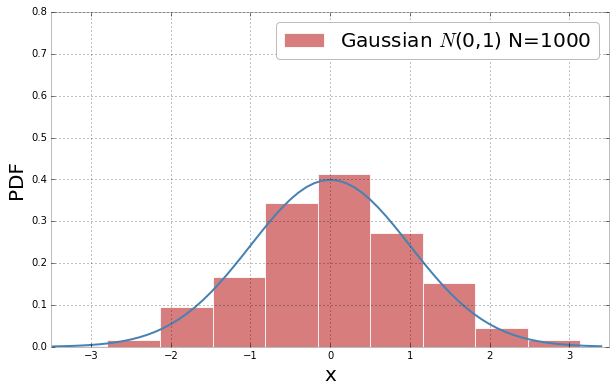

In [9]:
#it is very easy to write a gaussian distribution from scratch
def gaussian(x, mu, sig):
    norm = 1.0 / np.sqrt(2.0 * np.pi) / sig 
    return norm * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# mean 0 and std 1 are default values for np.random.randn
np.random.seed(111)
pl.figure(figsize=(10, 6))
for n in [10, 50, 100, 500, 1000]:
    pl.clf()
    pl.ylabel("PDF", fontsize = 20)
    pl.xlabel("x", fontsize = 20)
    pl.hist(np.random.randn(n), color = 'IndianRed', 
            normed = True, alpha = 0.8,
            label = r"Gaussian $N$(0,1) N=%d"%n)
    pl.xlim(-3.5, 3.5)
    pl.ylim(0, 0.8)
    pl.legend(fontsize = 20)
    display.display(pl.gcf())
    display.clear_output(wait = True)
    
#overplot the theoretical distribution: the pmf
x = np.arange(-3.5, 3.5, 0.1) 
pl.plot(x, gaussian(x, 0, 1), color = 'SteelBlue')
display.display(pl.gcf())
display.clear_output(wait = True)

## Gaussian distribution N(mu, sigma), changing mu and sigma (sample size = 1000)


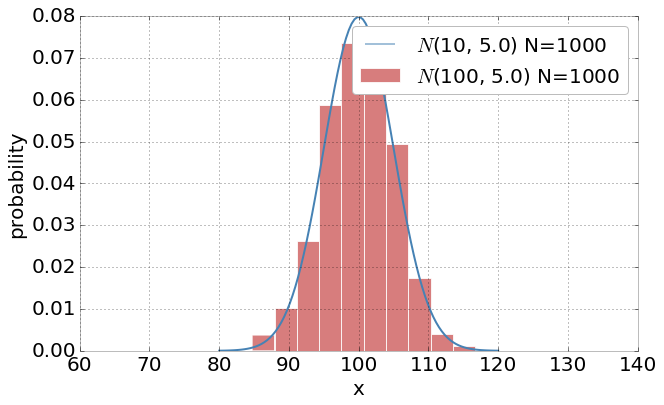

In [12]:
#it is very easy to write a gaussian distribution from scratch
def gaussian(x, mu, sig):
    norm = 1.0 / np.sqrt(2.0 * np.pi) / sig 
    return norm * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

muold, sigmaold = np.nan, np.nan
np.random.seed(111)
pl.figure(figsize=(10,6))
n = 1000

# loop over mu-sigma pairs with the zip function: 
# the n-th loop iteration will take the n-th entry in the mu list, 
# and the n-th entry in the sigmas list
for mu, sigma in zip([0,1,5,5,5,10,100], [0.5,0.5,0.5,1,5,5,5]):
    pl.clf()
    
    # add an if statemeth that prevents us from trying to plot 
    # the previous PDF if we are at the first loop step
    # i could have used a try/ecvept too to make it more pythonic
    if not np.isnan(muold):
        pl.plot(x, gaussian(x, muold, sigmaold), color='SteelBlue', 
            alpha = 0.5,
            label = r"$N$(%d, %.1f) N=%d"%(muold, sigmaold, N))
    
    pl.hist(np.random.normal(mu, sigma, n), color = 'IndianRed', 
            normed = True, alpha=0.8,
            label = r"$N$(%d, %.1f) N=%d"%(mu, sigma, N))
    
    pl.xlim(mu - 8 * sigma, mu + 8 * sigma)
    pl.ylabel("PDF", fontsize = 20)
    pl.xlabel("x", fontsize = 20)
    pl.xticks(fontsize = 20)
    pl.yticks(fontsize = 20)
    pl.legend(fontsize = 20)
    time.sleep(1)

    #overplot the theoretical distribution: the pdf
    x = np.linspace(mu-4*sigma, mu+4*sigma, 100) 
    pl.plot(x, gaussian(x, mu, sigma), color='SteelBlue',
           label=r"$N$(%d, %.1f) N=%d"%(mu, sigma, N))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1) 
    muold, sigmaold  = mu, sigma

pl.ylabel("probability")

# Central Limit Theorem demonstration with binomial distribution

for ANY distribution, as the sample size
increases, 

the distribution of sample means
converges to the population mean

and the distribution of the means is itself Gaussian 

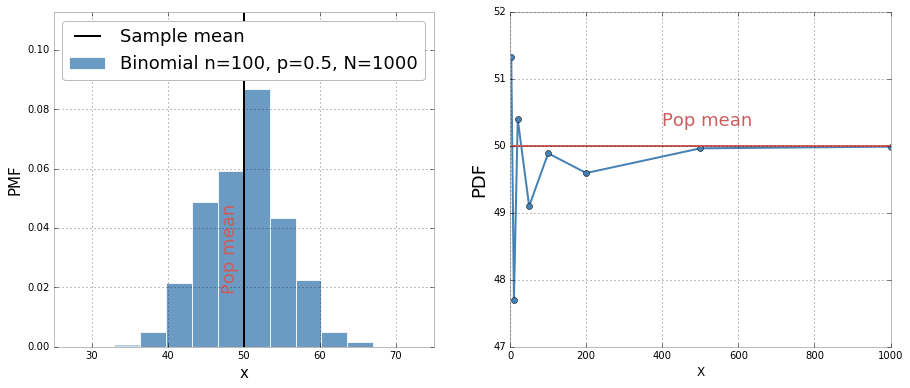

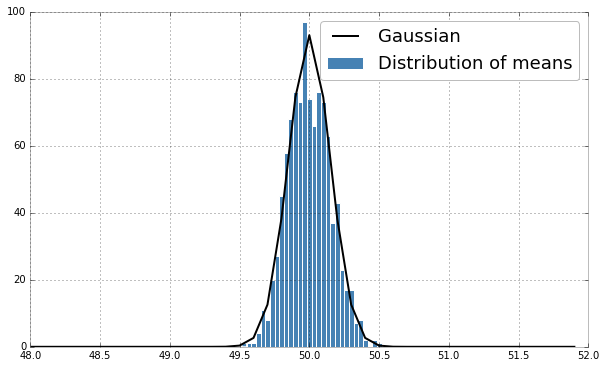

In [17]:
np.random.seed(111)
n = 100
p = 0.5
fig = pl.figure(figsize=(15,6))

sampSizes = np.array([3,10,20,50,100,200,500,1000])
means = np.zeros(sampSizes.shape) * np.nan

# loop over sample size
for i, N in enumerate(sampSizes):
    fig.clf()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    sample = np.random.binomial(n, p, N)
    
    heights = ax1.hist(sample, alpha = 0.8, 
            label = "Binomial n=%d, p=%.1f, N=%d"%(n, p, N),
            color = 'SteelBlue', normed = True)
    ax1.set_xlim(25, 75)
    
    ax1.set_ylabel("PMF", fontsize = 15)
    ax1.set_xlabel("x", fontsize = 15)
    ax1.plot([100*0.5, 100*0.5], [0, pl.ylim()[1]], "IndianRed")
    means[i] = sample.mean()
    ax1.plot([means[-1], means[-1]], [0, pl.ylim()[1]], "k",
           label = "Sample mean")
    
    ax1.legend(fontsize = 18)
    ax1.set_ylim(0, heights[0].max()*1.3)
    ax1.text(100*0.47, heights[0].max()*0.5, "Pop mean", rotation=90,
           color="IndianRed", fontsize=18)
    ax2.plot(sampSizes, means, '-o', label = "sample mean")
    ax2.set_xlabel("sample size N")
    ax2.set_ylabel("sample mean", fontsize=18)
    ax2.plot(sampSizes, np.ones(sampSizes.shape) * n * p, label="Pop mean")
    ax2.set_ylim(47, 52)
    ax2.text(400, 50.3, "Pop mean",
           color="IndianRed", fontsize=18)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    
    
binmeans = [np.random.binomial(n, p, 1000).mean() for N in np.arange(1,1000)]
pl.xlabel("X")
pl.ylabel("PDF")
pl.figure(figsize = (10,6))
patch = pl.hist(binmeans, bins=30, label = "Distribution of means")
pl.plot(np.arange(48, 52, 0.1), 
        gaussian(np.arange(48, 52, 0.1), n*p, 0.15)*35, 'k', label = "Gaussian")
pl.legend(fontsize = 18)

# the Poisson Distribution approaches Gaussian for large $lambda$, with mean lamdba & stdev lambda (and so does the binomial!) 

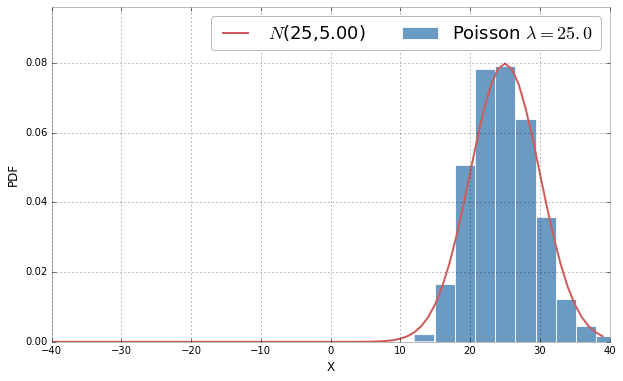

In [19]:
from scipy.stats import poisson

np.random.seed(111)
pl.figure(figsize = (10,6))
for lmbd in [1, 2, 3, 5, 10, 25]:
    
    pl.clf()
    pl.hist(np.random.poisson(lmbd, size=1000), alpha = 0.8, 
            label=r"Poisson $\lambda=%.1f$"%(lmbd), 
            color = 'SteelBlue', normed = True)
    pl.xlim(-40,40)
    pl.ylim(0, pl.ylim()[1]*1.2)
    
    time.sleep(1)
    
    #overplot the theoretical distribution: the pmf
    x = np.arange(-40,40,1) 
    pl.plot(x, gaussian(x, lmbd, np.sqrt(lmbd)), color='IndianRed', 
            label = r"$N$(%d,%.2f)"%(lmbd, np.sqrt(lmbd)))
    pl.legend(fontsize = 18, ncol=2)
    pl.xlabel("X")
    pl.ylabel("PDF")
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)